In [102]:
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors   # import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.inspection import plot_partial_dependence
from sklearn.utils.multiclass import unique_labels

In [49]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})
%matplotlib inline

In [77]:
def acc(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp+tn)/(tn+fn+fp+tp)
    return accuracy

In [78]:
def prec(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp/(tp+fp)
    return precision

In [185]:
def rec(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall = tp/(tp+fn)
    return recall

In [186]:
acc_score = make_scorer(acc)
prec_score = make_scorer(prec)
recall_score = make_scorer(rec)

In [6]:
data = pd.read_csv("../data/clean_train.csv", index_col="Unnamed: 0")
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,0,0,0.0,0,False,100.0,False
1,8.06,5.0,5.0,1.00,0,0,0.0,2,True,0.0,False
2,21.50,4.0,0.0,1.00,1,1,0.0,1,True,100.0,False
3,9.46,5.0,0.0,2.75,1,0,100.0,1,False,100.0,False
4,13.77,5.0,0.0,1.00,1,1,0.0,0,False,100.0,False


In [7]:
y = data.pop("churn").values

In [46]:
cols_X = data.columns.tolist()

In [8]:
X = data.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
rf = RandomForestClassifier(oob_score=True)

In [11]:
rf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
out_of_box_pred = rf.predict(X_test)

In [13]:
rf.score(X_test, y_test)

0.7534

In [137]:
param_grid = {"criterion" : ['gini'],
              "max_depth" : [None], 
              "max_features" : [None, 'sqrt', 'log2'], 
              "min_samples_leaf" : [5], 
              "min_samples_split" : [2],
              "n_estimators" : [10, 25, 50, 75, 100], 
              "n_jobs" : [-1],
              "oob_score" : [True]}

In [138]:
rf = RandomForestClassifier()

In [187]:
rf_grid = GridSearchCV(rf, param_grid, scoring=recall_score, n_jobs=-1, cv=5, verbose=1)

In [188]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [189]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True}

In [190]:
rf_grid.best_score_

0.6538427365615282

In [191]:
best_rf = rf_grid.best_estimator_

In [192]:
feature_importances = best_rf.feature_importances_

Feature ranking:
1. feature 1 (0.246940)
2. feature 0 (0.195596)
3. feature 4 (0.122354)
4. feature 9 (0.116948)
5. feature 2 (0.063345)
6. feature 6 (0.062263)
7. feature 7 (0.060892)
8. feature 5 (0.057962)
9. feature 8 (0.037642)
10. feature 3 (0.036058)


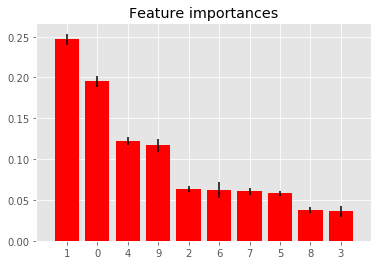

In [193]:
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_],
             axis=0)
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.savefig("../img/random_forest_feature_importance.png")
plt.show()

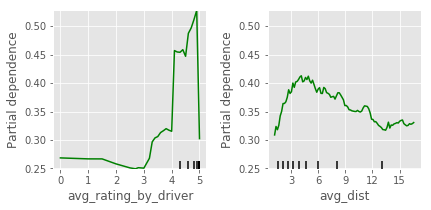

In [194]:
plot_partial_dependence(best_rf, X_train, features=[1, 0], feature_names=cols_X, n_jobs=-1)
plt.savefig("../img/random_forest_top2_partial_dependencies.png")

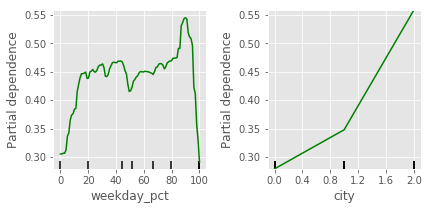

In [195]:
plot_partial_dependence(best_rf, X_train, features=[9, 4], feature_names=cols_X, n_jobs=-1)
plt.savefig("../img/random_forest_3_4_partial_dependencies.png")

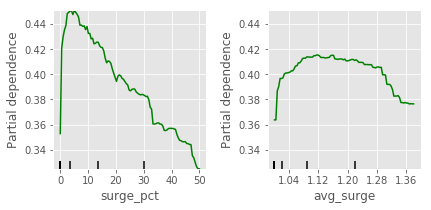

In [196]:
plot_partial_dependence(best_rf, X_train, features=[6, 3], feature_names=cols_X, n_jobs=-1)
plt.savefig("../img/random_forest_5_6_partial_dependencies.png")

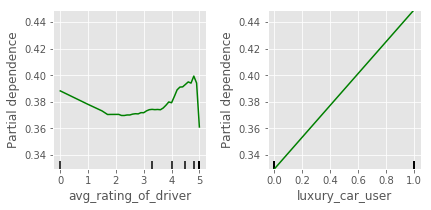

In [197]:
plot_partial_dependence(best_rf, X_train, features=[2, 8], feature_names=cols_X, n_jobs=-1)
plt.savefig("../img/random_forest_bottom2_partial_dependencies.png")

In [198]:
y_pred = best_rf.fit(X_train, y_train).predict(X_test)
class_names = unique_labels(y_test)

In [199]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes,
           yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[5293  930]
 [1309 2468]]


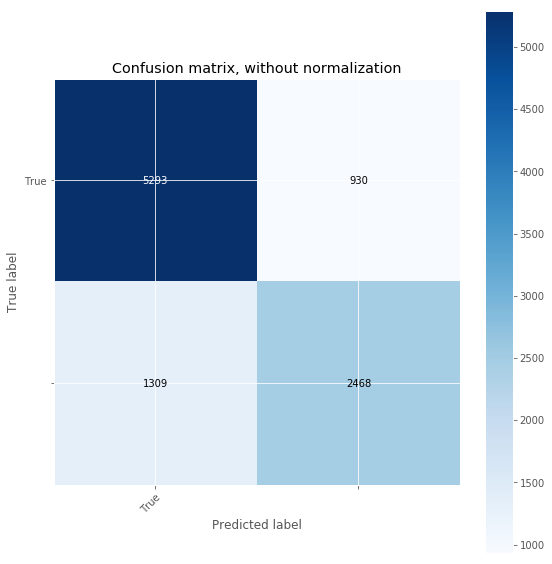

In [200]:
plot_confusion_matrix(y_test, y_pred, class_names);
plt.savefig("../img/random_forest_confusion_matrix_not_normalized.png")

In [201]:
acc(y_test, y_pred)

0.7761

In [202]:
rec(y_test, y_pred)  #recall

0.6534286470743976

In [203]:
prec(y_test, y_pred) #precision

0.7263095938787522

compare matrices and recall scores, explain why we chose recall over acc, prec, etc. 

Normalized confusion matrix
[[0.85055439 0.14944561]
 [0.34657135 0.65342865]]


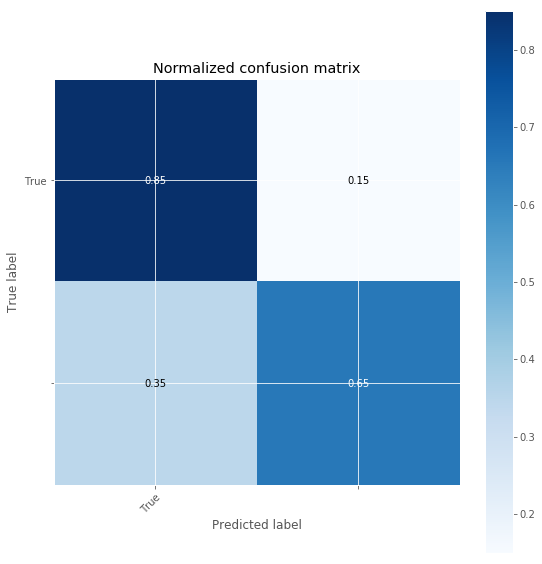

In [204]:
plot_confusion_matrix(y_test, y_pred, class_names, normalize=True);
plt.savefig("../img/random_forest_confusion_matrix_normalized.png")

In [ ]:
data_train = pd.read_csv("../data/clean_train.csv", index_col="Unnamed: 0")
data_holdout = pd.read_csv("../data/clean_holdout.csv", index_col="Unnamed: 0")
y_train = data_train.pop("churn").values
X_train = data_train.values
y_test = data_holdout.pop("churn").values
X_test = data_holdout.values